# Using Qiskit Runtime with session and primitives

In this tutorial we will show you how to use the Qiskit Runtime primitives within a session. 

We will walk through an example of using the `Estimator` primitive, explore the different options you can use to configure it, and show you how to invoke the primitive efficiently inside a session.

## Primitives

Primitives are core functions that make it easier to build modular algorithms and applications. 

Instead of simply returning counts, they return more immediately meaningful information. 

Additionally, they provide a seamless way to access the latest advancements in IBM Quantum hardware and software.

The initial release of Qiskit Runtime includes two primitives: Estimator and Sampler.

**Sampler:** Generates quasi-probabilities from input circuits.

**Estimator:** Calculates expectation values from input circuits and observables.

In this tutorial we will focus on the `Estimator` primitive.

## Using the Estimator primitive

Similar to the `Backend` base class, there is an `Estimator` base class defined in Qiskit Terra that standardizes the way users interact with all `Estimator` implementations.
This allows users to easily change their choice of simulator or device for performing expectation value calculations, even if the underlying implementation is different. 

In this section we will be using the default implementation in Qiskit Terra, which uses a local statevector simulator.

### 1. Create a circuit

For a basic expectation value calculation you will need at least one quantum circuit to prepare our system in a precise quantum state for study. Our examples all have circuits in them, but you can use Qiskit to create your own. To learn how to create circuits by using Qiskit, see the [Circuit basics tutorial](https://qiskit.org/documentation/tutorials/circuits/01_circuit_basics.html).

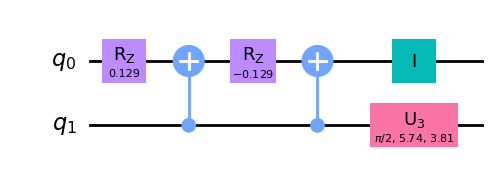

In [1]:
from qiskit.circuit.random import random_circuit

circuit = random_circuit(2, 2, seed=0).decompose(reps=1)
display(circuit.draw("mpl"))

### 2. Create an observable to measure

You will also need at least one observable to measure. Observables represent physical properties of a quantum system (e.g. energy, spin), and allow said properties to be measured (e.g. their expectation values) for a given state of our system. For simplicity, you can use the [PauliSumOp class](https://qiskit.org/documentation/stubs/qiskit.opflow.primitive_ops.html#module-qiskit.opflow.primitive_ops) in Qiskit to define them, as illustrated in the example below.

In [2]:
from qiskit.quantum_info import SparsePauliOp

observable = SparsePauliOp("XZ")
print(f">>> Observable: {observable.paulis}")

>>> Observable: ['XZ']


### 3. Initialize an Estimator class

The next step is to create an instance of an `Estimator` class. This can be any `Estimator` class that complies with the `Estimator` primitive specification. For simplicity, we will use Qiskit Terra's `qiskit.primitives.Estimator` class, based on the [Statevector construct](https://qiskit.org/documentation/stubs/qiskit.quantum_info.Statevector.html?highlight=statevector#qiskit.quantum_info.Statevector) (i.e. algebraic simulation).

In [3]:
from qiskit.primitives import Estimator

estimator = Estimator()

### 4. Invoke the Estimator and get results

To calculate the expectation values, invoke the `run()` method of the `Estimator` instance you just created and pass in the circuit and observable as input parameters. This method call is asynchronous, and you will get a `Job` object back. You can use this object to query for information like `job_id()` and `status()`.

In [4]:
job = estimator.run(circuit, observable)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: ccd8ea88-99f4-4dc3-a772-20db757a8b1a
>>> Job Status: JobStatus.DONE


The `result()` method of the job will return the `EstimatorResult`, which includes both the expectation values and job metadata. 

In [5]:
result = job.result()
print(f">>> {result}")
print(f"  > Expectation value: {result.values[0]}")

>>> EstimatorResult(values=array([0.85347811]), metadata=[{}])
  > Expectation value: 0.8534781134132173


You can keep invoking the `run()` method again with the different inputs:

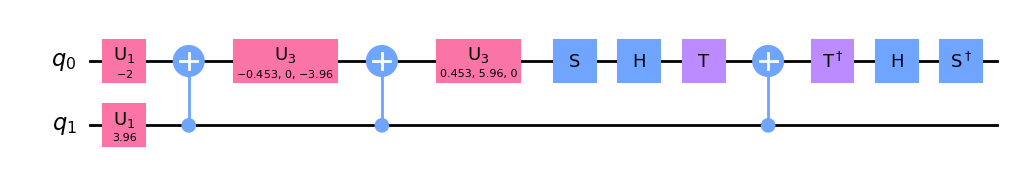

>>> Observable: ['IY']
>>> Expectation value: -1.582539029327245e-16


In [6]:
circuit = random_circuit(2, 2, seed=1).decompose(reps=1)
observable = SparsePauliOp("IY")

job = estimator.run(circuit, observable)
result = job.result()

display(circuit.draw("mpl"))
print(f">>> Observable: {observable.paulis}")
print(f">>> Expectation value: {result.values[0]}")

You can also provide compound inputs to the `run()` method:

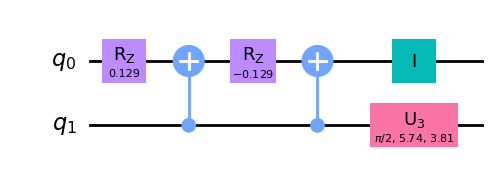

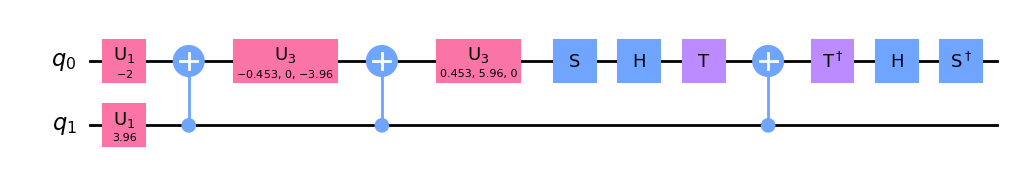

>>> Observables: [PauliList(['XZ']), PauliList(['IY'])]
>>> Expectation values: [0.8534781134132173, -1.582539029327245e-16]


In [7]:
circuits = (
    random_circuit(2, 2, seed=0).decompose(reps=1),
    random_circuit(2, 2, seed=1).decompose(reps=1),
)
observables = (
    SparsePauliOp("XZ"),
    SparsePauliOp("IY"),
)

job = estimator.run(circuits, observables)
result = job.result()

[display(cir.draw("mpl")) for cir in circuits]
print(f">>> Observables: {[obs.paulis for obs in observables]}")
print(f">>> Expectation values: {result.values.tolist()}")

Or use parameterized circuits:

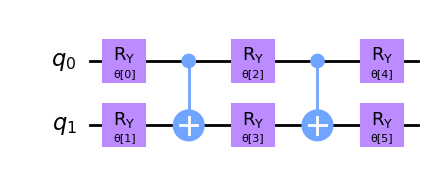

>>> Observable: ['ZI']
>>> Parameter values: [0, 1, 2, 3, 4, 5]
>>> Expectation value: -0.6485568434766461


In [8]:
from qiskit.circuit.library import RealAmplitudes

circuit = RealAmplitudes(num_qubits=2, reps=2).decompose(reps=1)
observable = SparsePauliOp("ZI")
parameter_values = [0, 1, 2, 3, 4, 5]

job = estimator.run(circuit, observable, parameter_values)
result = job.result()

display(circuit.draw("mpl"))
print(f">>> Observable: {observable.paulis}")
print(f">>> Parameter values: {parameter_values}")
print(f">>> Expectation value: {result.values[0]}")

## Using Qiskit Runtime Estimator

In this section we will go over how to use Qiskit Runtime's implementation of the `Estimator` primitive.

### 1. Initialize account

Since Qiskit Runtime `Estimator` is a managed service, you will first need to initialize your account. You can then select the simulator or real backend you want to use to calculate the expectation value. 

In [9]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_quantum")
backend = service.backend("ibmq_qasm_simulator")

### 2. Create a circuit and an observable

Just like the section before, you will need at least one circuit and one observable as inputs to the `Estimator` primitive.

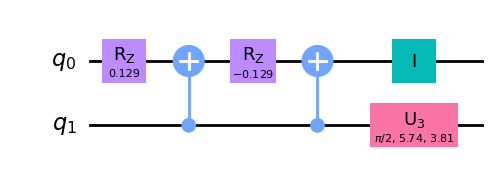

>>> Observable: ['XZ']


In [10]:
from qiskit.circuit.random import random_circuit
from qiskit.quantum_info import SparsePauliOp

circuit = random_circuit(2, 2, seed=0).decompose(reps=1)
display(circuit.draw("mpl"))

observable = SparsePauliOp("XZ")
print(f">>> Observable: {observable.paulis}")

### 3. Initialize the Qiskit Runtime Estimator

Here we are initializing an instance of `qiskit_ibm_runtime.Estimator` instead of `qiskit.primitives.Estimator` to use Qiskit Runtime's implementation of the `Estimator`. 

When you initialize the `Estimator`, you'll need to pass in the backend you previously selected as the target device (or simulator), using the `session` parameter. This automatically opens a session for that backend. We will talk more about session in a later section.

In [11]:
from qiskit_ibm_runtime import Estimator

estimator = Estimator(session=backend)

### 4. Invoke the Estimator and get results

You can then invoke the `run()` method to calculate expectation values for the input circuit(s) and observable(s).

In [12]:
job = estimator.run(circuit, observable)
print(f">>> Job ID: {job.job_id()}")
print(f">>> Job Status: {job.status()}")

>>> Job ID: cdk1j0hg1234sbmpr5vg
>>> Job Status: JobStatus.RUNNING


In [13]:
result = job.result()
print(f">>> {result}")
print(f"  > Expectation value: {result.values[0]}")
print(f"  > Metadata: {result.metadata[0]}")

>>> EstimatorResult(values=array([0.8515]), metadata=[{'variance': 0.27494774999999994, 'shots': 4000, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}])
  > Expectation value: 0.8515
  > Metadata: {'variance': 0.27494774999999994, 'shots': 4000, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}


## Options

Primitives come with a number of options that are grouped into different categories. Commonly used options, such as `resilience_level`, are at the first level.

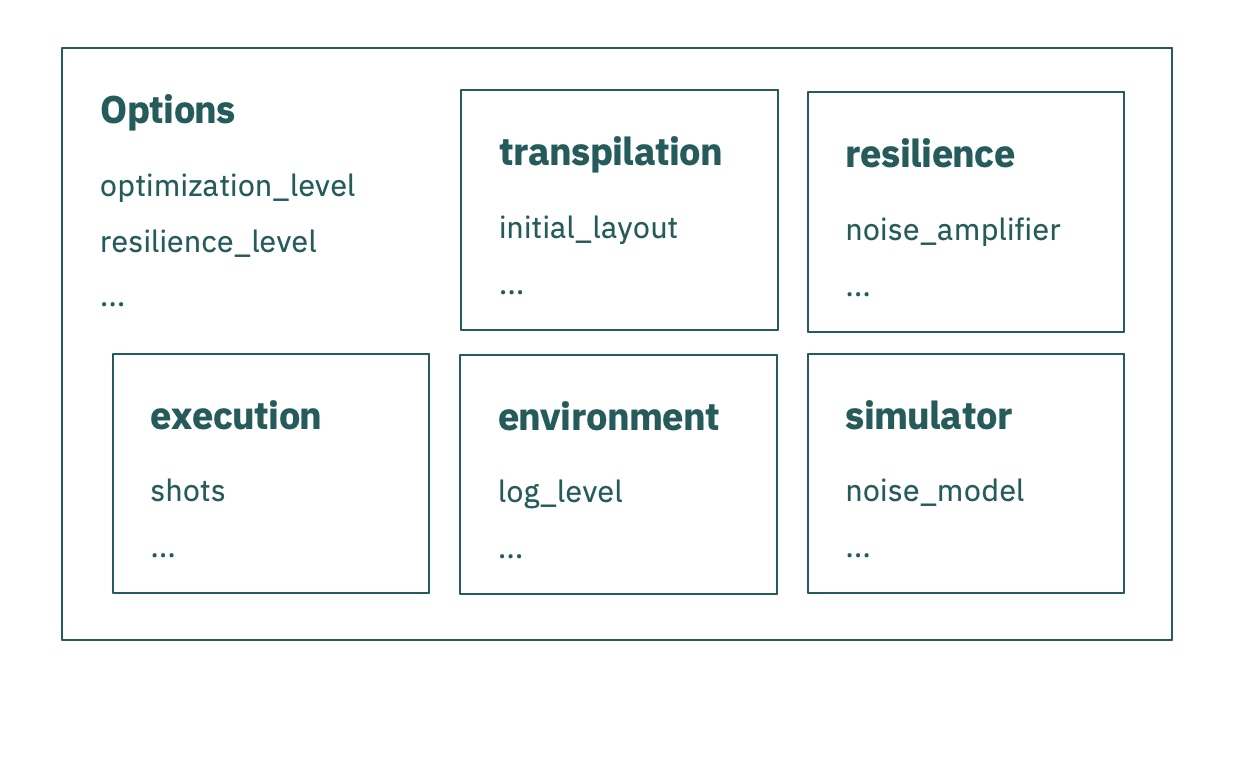

You can use the `Options` class to specify different options.

In the example below, we create an instance of the `Options` class. `optimization_level` is a first level option and can be passed as an input parameter. Options related to the execution environment are passed using the `environment` parameter.

In [14]:
from qiskit_ibm_runtime import Options

options = Options(optimization_level=3, environment={"log_level": "INFO"})

`Options` supports auto-complete:

Once you create an instance of the `Options` class, you can use auto-complete to see what options are available. If you choose one of the categories, you can use auto-complete again to see what options are available under that category. 

In [15]:
from qiskit_ibm_runtime import Options

options = Options()
options.resilience_level = 1
options.execution.shots = 2048

Options can be at the primitive level:

When creating an instance of the `Estimator` class, you can pass in the `options` you just created. Those options will then be applied when you use `run()` to perform the calculation. 

In [16]:
estimator = Estimator(session=backend, options=options)
result = estimator.run(circuit, observable).result()
print(f">>> Metadata: {result.metadata[0]}")

>>> Metadata: {'variance': 0.2781639099121094, 'shots': 2048, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}


Or overwrite at the job level:

You can also pass in options via the `run()` method. This will overwrite the options you specified when creating the `Estimator` instance for that particular execution. 

Since most users will only overwrite a handful of options at the job level, it is not necessary to specify the category the options are in. The code below, for example, specifies `shots=1024` instead of `execution={"shots": 1024}` (which is also valid). 

In [17]:
estimator = Estimator(session=backend, options=options)
result = estimator.run(circuit, observable, shots=1024).result()
print(f">>> Metadata: {result.metadata[0]}")

>>> Metadata: {'variance': 0.2513694763183594, 'shots': 1024, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}


### Error suppression and mitigation

`optimization_level` and `resilience_level` are used to configure error suppress and mitigation.

Advanced mitigation options can be specified under `resilience`.

In [18]:
from qiskit_ibm_runtime import Options

# optimization_level=3 adds dynamical decoupling
# resilience_level=1 adds readout error mitigation
options = Options(optimization_level=3, resilience_level=1)

In [19]:
estimator = Estimator(session=backend, options=options)
result = estimator.run(circuit, observable).result()
print(f">>> Expectation value: {result.values[0]}")
print(f">>> Metadata: {result.metadata[0]}")

>>> Expectation value: 0.854
>>> Metadata: {'variance': 0.27068400000000004, 'shots': 4000, 'readout_mitigation_num_twirled_circuits': 16, 'readout_mitigation_shots_calibration': 8192}


## Session

A Qiskit Runtime _session_ allows you to group a collection of iterative calls to the quantum computer. 

A session is started when the first job within the session is started. 

Subsequent jobs within an active session are prioritized by the scheduler, and data used within a session, such as transpiled circuits, is also cached.

### Session timing

A session is automatically closed when it times out. 

Timeout value can be set using `max_time`.

Cannot exceed system maximum (8h for physical device).

A session also has an _interactive_ timeout value.

If no session jobs are queued within that window, the session is temporarily deactivated and normal job selection is resumed.

Set by the system to 5 minutes (subject to change).

### Invoking Estimator.run within a session

You can create a Qiskit Runtime session using the context manager (`with ...:`), which automatically opens and closes the session for you. You can invoke `Estimator.run` one or more times within a session:

In [20]:
from qiskit_ibm_runtime import Session, Estimator

with Session(backend=backend, max_time="1h"):
    estimator = Estimator()

    result = estimator.run(circuit, observable).result()
    print(f">>> Expectation value from the first run: {result.values[0]}")

    result = estimator.run(circuit, observable).result()
    print(f">>> Expectation value from the second run: {result.values[0]}")

>>> Expectation value from the first run: 0.838
>>> Expectation value from the second run: 0.855


### Invoke multiple primitives in a session

You are not restricted to a single primitive function within a session. In this section we will show you an example of using multiple primitives. 

First we prepare a circuit for the sampler primitive.

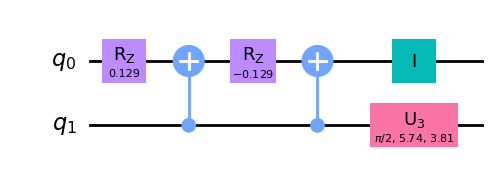

In [21]:
from qiskit.circuit.random import random_circuit

sampler_circuit = random_circuit(2, 2, seed=0).decompose(reps=1)
sampler_circuit.measure_all()
display(circuit.draw("mpl"))

The example below shows how you can create both an instance of the `Sampler` class and one of the `Estimator` class and invoke their `run()` methods within a session. 

In [22]:
from qiskit_ibm_runtime import Session, Sampler, Estimator

with Session(backend=backend):
    sampler = Sampler()
    estimator = Estimator()

    result = sampler.run(sampler_circuit).result()
    print(f">>> Quasi Distribution from the sampler job: {result.quasi_dists[0]}")

    result = estimator.run(circuit, observable).result()
    print(f">>> Expectation value from the estimator job: {result.values[0]}")

>>> Quasi Distribution from the sampler job: {0: 0.5165, 2: 0.4835}
>>> Expectation value from the estimator job: 0.8515


The calls can also be asynchronous

In [23]:
from qiskit_ibm_runtime import Session, Sampler, Estimator

with Session(backend=backend):
    sampler = Sampler()
    estimator = Estimator()

    sampler_job = sampler.run(sampler_circuit)
    estimator_job = estimator.run(circuit, observable)
    
    print(f">>> Quasi Distribution from the sampler job: {sampler_job.result().quasi_dists[0]}")
    print(f">>> Expectation value from the estimator job: {estimator_job.result().values[0]}")

>>> Quasi Distribution from the sampler job: {0: 0.499, 2: 0.501}
>>> Expectation value from the estimator job: 0.857


# Summary

Below is a quick recap of using Qiskit Runtime primitives, options, and session.

In [24]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler, Estimator, Options

# 1. Initialize account
service = QiskitRuntimeService(channel="ibm_quantum")

# 2. Specify options, such as enabling error mitigation
options = Options(resilience_level=1)

# 3. Select a backend.
backend = service.backend("ibmq_qasm_simulator")

# 4. Create a session
with Session(backend=backend):

    # 5. Create primitive instances
    sampler = Sampler(options=options)
    estimator = Estimator(options=options)

    # 6. Submit jobs
    sampler_job = sampler.run(sampler_circuit)
    estimator_job = estimator.run(circuit, observable)
    
    # 7. Get results
    print(f">>> Quasi Distribution from the sampler job: {sampler_job.result().quasi_dists[0]}")
    print(f">>> Expectation value from the estimator job: {estimator_job.result().values[0]}")

>>> Quasi Distribution from the sampler job: {0: 0.508, 2: 0.492}
>>> Expectation value from the estimator job: 0.8435


# More about Qiskit Runtime primitives

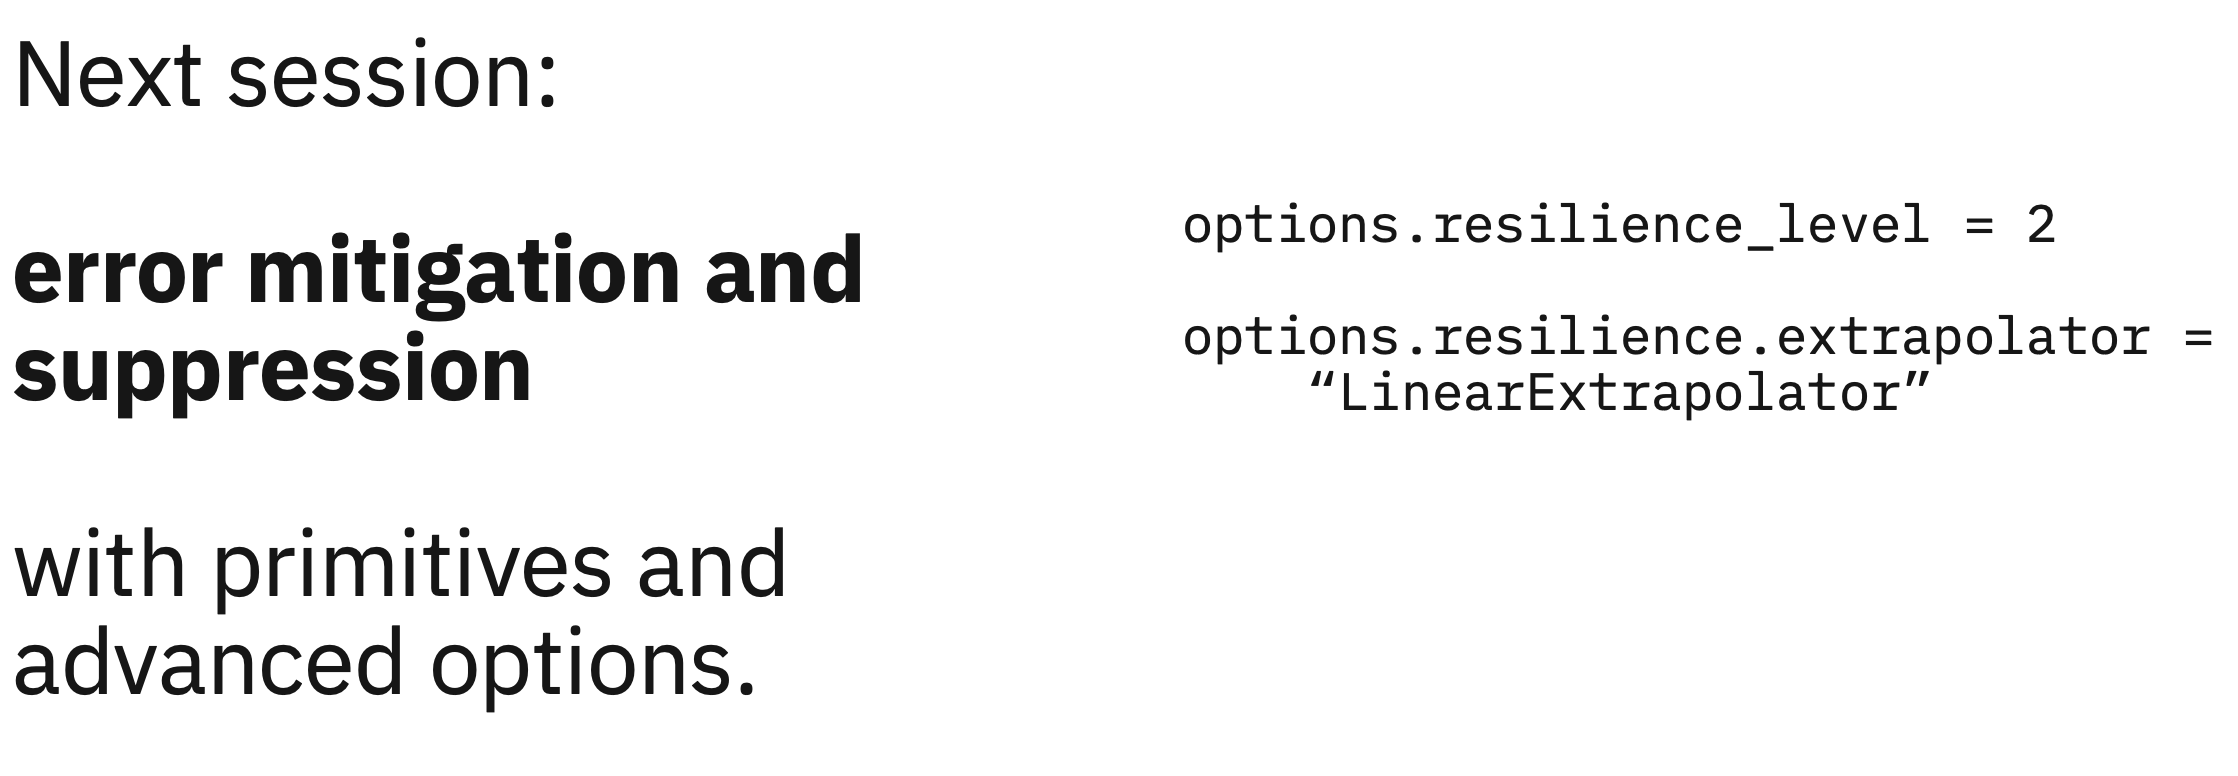

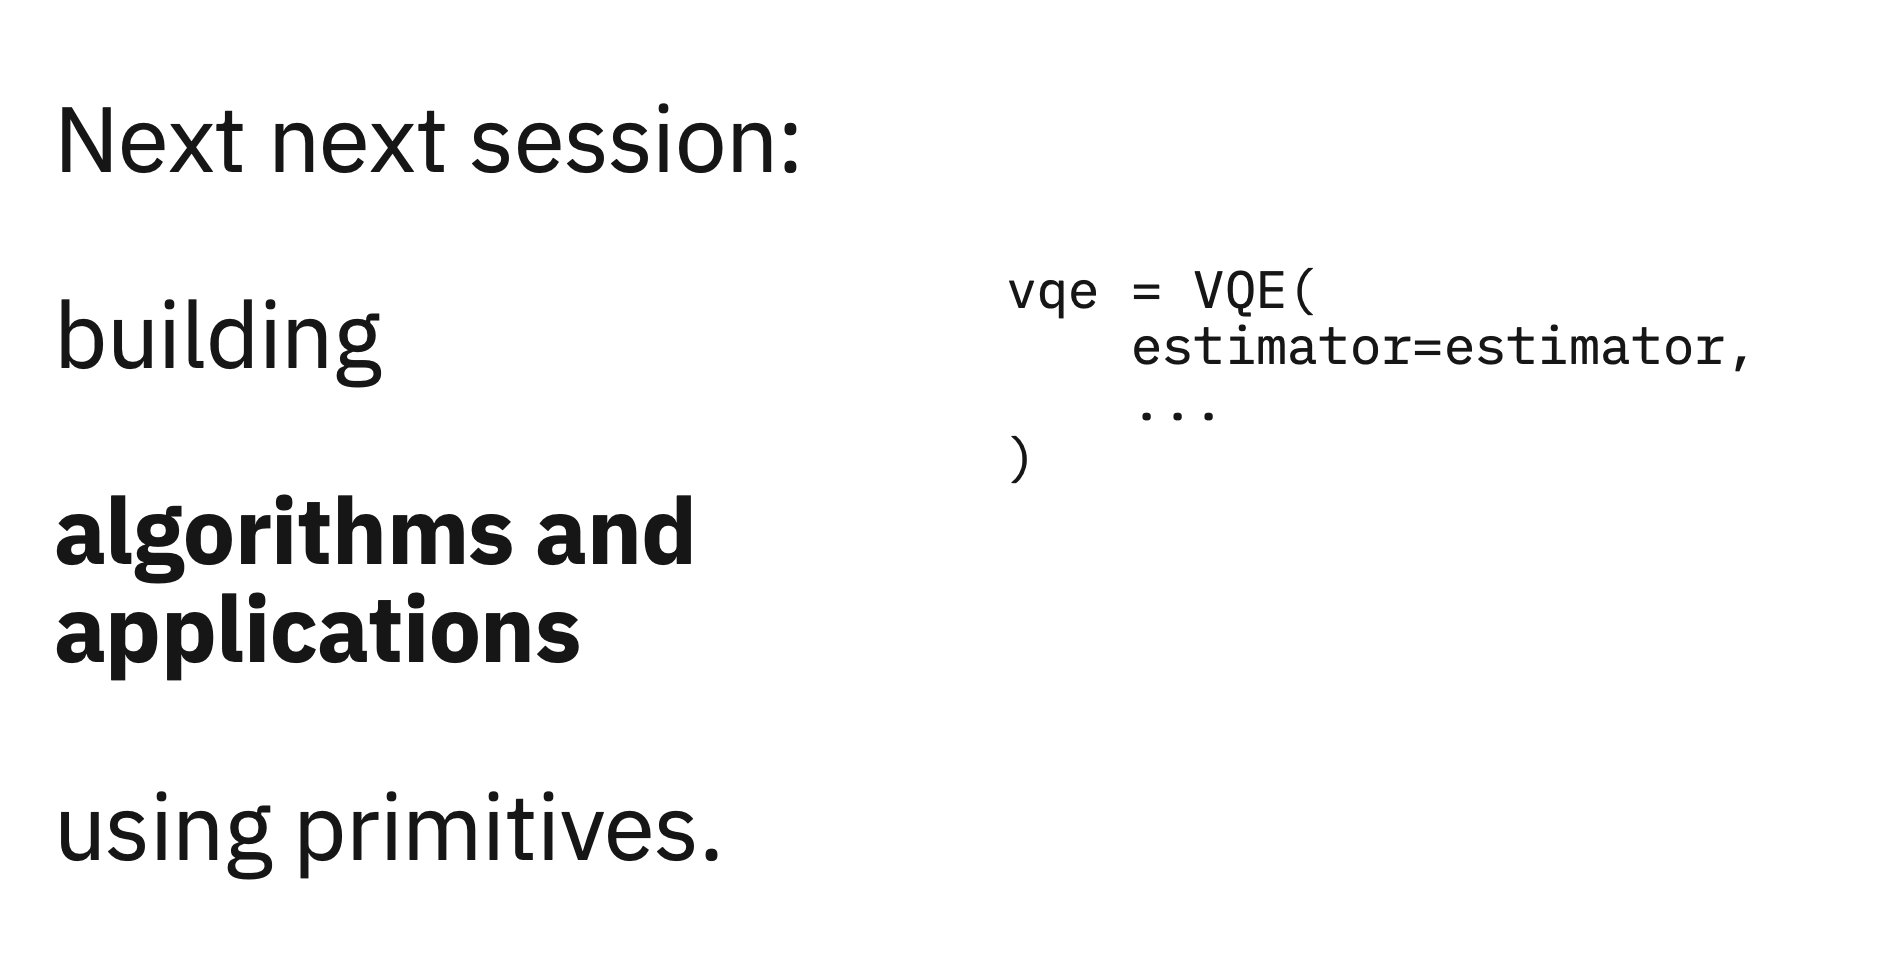

# Questions?